# Cartpole



The state and control vectors $\textbf{x}$ and $\textbf{u}$ are defined as follows:

$$
\begin{equation*}
\textbf{x} = \begin{bmatrix}
    x & \dot{x} & \theta & \dot{\theta}
    \end{bmatrix}
\end{equation*}
$$

$$
\begin{equation*}
\textbf{u} = \begin{bmatrix}
    F_{x}
    \end{bmatrix}
\end{equation*}
$$

The goal is to swing the carptole upright:
$$
\begin{equation*}
\textbf{x}_{goal} = \begin{bmatrix}
    0 & 0 & 0 & 0
    \end{bmatrix}
\end{equation*}
$$

In [1]:
%matplotlib inline

In [2]:
from __future__ import print_function

In [3]:
import matplotlib.pyplot as plt

In [4]:
import pddp
import pddp.examples

In [5]:
import torch
import numpy as np

In [6]:
DT = 0.1  # Time step (s).
RENDER = True  # Whether to render the environment or not.
N = 25 # Horizon length.

# Disable uncertainty since we are dealing with known dynamics.
ENCODING = pddp.StateEncoding.IGNORE_UNCERTAINTY

In [7]:
cost = pddp.examples.cartpole.CartpoleCost()
model = pddp.examples.cartpole.CartpoleDynamicsModel(DT)
env = pddp.examples.cartpole.CartpoleEnv(dt=DT, render=RENDER)

In [8]:
def plot(Z, U):
    t = np.arange(N + 1) * DT
    X = pddp.utils.encoding.decode_mean(Z, ENCODING).detach().numpy()
    U = U.detach().numpy()

    x = X[:, 0]
    x_dot = X[:, 1]
    theta = np.unwrap(X[:, 2])  # Makes for smoother plots.
    theta_dot = X[:, 3]
    
    plt.figure()
    plt.plot(theta, theta_dot)
    plt.xlabel("Orientation (rad)")
    plt.ylabel("Angular velocity (rad/s)")
    plt.title("Orientation Phase Plot")

    plt.figure()
    plt.plot(t, x)
    plt.xlabel("Time (s)")
    plt.ylabel("Position (m)")
    plt.title("Position path")
    
    plt.figure()
    plt.plot(t, x_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Velocity (m / s)")
    plt.title("Velocity path")
    
    plt.figure()
    plt.plot(t, theta)
    plt.xlabel("Time (s)")
    plt.ylabel("Orientation (rad)")
    plt.title("Orientation path")

    plt.figure()
    plt.plot(t, theta_dot)
    plt.xlabel("Time (s)")
    plt.ylabel("Angular velocity (rad / s)")
    plt.title("Angular velocity path")
    
    plt.figure()
    plt.plot(t[:-1], U)
    plt.xlabel("Time (s)")
    plt.ylabel("Force (N)")
    plt.title("Action path")
    
    plt.figure()
    plt.plot(J_hist)
    plt.xlabel("Iteration")
    plt.ylabel("Total loss")
    plt.title("Loss path")

In [9]:
def on_iteration(iteration, Z, U, J_opt, accepted, converged):
    J_opt = J_opt.detach().numpy()

    J_hist.append(J_opt)
    info = "CONVERGED" if converged else ("accepted" if accepted else "FAILED")
    final_state = Z[-1].detach().numpy()
    final_state[2] = (final_state[2] + np.pi) % (2 * np.pi) - np.pi
    print("iteration", iteration + 1, info, J_opt, final_state)

In [10]:
controller = pddp.controllers.PDDPController(env, model, cost)

In [11]:
U = 1e-1 * torch.randn(N, model.action_size)

In [12]:
J_hist = []
controller.eval()
Z, U = controller.fit(U, encoding=ENCODING, n_iterations=200, tol=0,
                      on_iteration=on_iteration)

iteration 7 FAILED 35.988564 [-0.03410928  0.6549763   0.1880185  -3.7739592 ]
iteration 8 accepted 26.241331 [ 0.00330507  0.6438788   0.1625298  -2.152323  ]
iteration 9 accepted 22.552553 [-0.04666299  0.40992722  0.32877725 -0.8942009 ]
iteration 10 accepted 20.982973 [0.02548803 0.32450834 0.29277104 0.05737484]
iteration 11 accepted 20.685219 [ 0.0521007   0.39539665  0.17743713 -0.24619496]
iteration 13 FAILED 20.685219 [ 0.0521007   0.39539665  0.17743713 -0.24619496]
iteration 14 accepted 20.603916 [ 0.2744387  0.8735059 -0.221265  -1.4468187]
iteration 15 accepted 20.192566 [ 0.2573735   0.76154435 -0.22463658 -1.4840562 ]
iteration 16 accepted 19.823092 [ 0.24833593  0.66288227 -0.23866682 -1.5356082 ]
iteration 17 FAILED 19.823092 [ 0.24833593  0.66288227 -0.23866682 -1.5356082 ]
iteration 18 FAILED 19.823092 [ 0.24833593  0.66288227 -0.23866682 -1.5356082 ]
iteration 19 accepted 19.541403 [ 0.24937236  0.5513418  -0.26283938 -1.6014326 ]
iteration 20 accepted 17.722916 [ 0

iteration 111 accepted 11.323884 [-0.01961301 -0.02236444 -0.05359937 -0.01066172]
iteration 112 accepted 11.323876 [-0.01965461 -0.02224959 -0.05357727 -0.01061589]
iteration 113 accepted 11.323869 [-0.01969248 -0.02218686 -0.05351373 -0.01058859]
iteration 114 accepted 11.323861 [-0.01973182 -0.02208386 -0.05348912 -0.01054746]
iteration 115 accepted 11.323854 [-0.01976805 -0.02201898 -0.05343463 -0.01051968]
iteration 116 accepted 11.323849 [-0.01984059 -0.02183546 -0.05338126 -0.01044589]
iteration 117 accepted 11.323841 [-0.01985505 -0.02182172 -0.05334387 -0.0104388 ]
iteration 118 accepted 11.323774 [-0.02091529 -0.01948956 -0.05222801 -0.0094837 ]
iteration 119 accepted 11.323766 [-0.02091541 -0.01948439 -0.05223551 -0.00948179]
iteration 120 FAILED 11.323766 [-0.02091541 -0.01948439 -0.05223551 -0.00948179]
iteration 121 FAILED 11.323766 [-0.02091541 -0.01948439 -0.05223551 -0.00948179]
iteration 122 FAILED 11.323766 [-0.02091541 -0.01948439 -0.05223551 -0.00948179]
iteration 

/Users/anass/Dev/personal/pddp/pddp/controllers/ilqr.py:235: UserWarning: exceeded max regularization term
  warnings.warn("exceeded max regularization term")


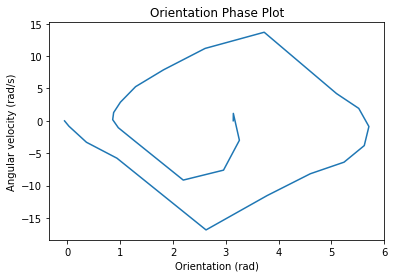

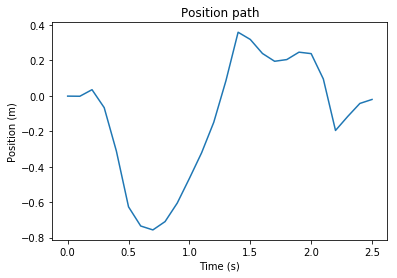

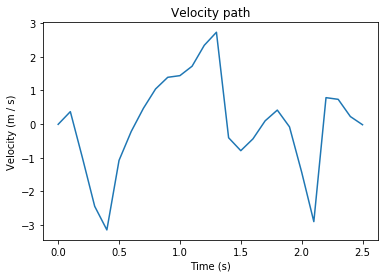

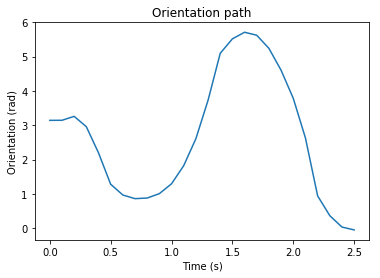

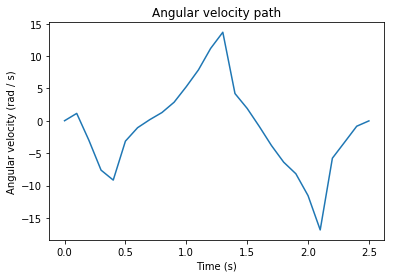

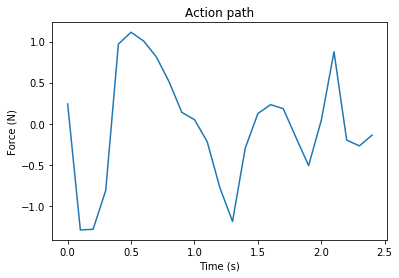

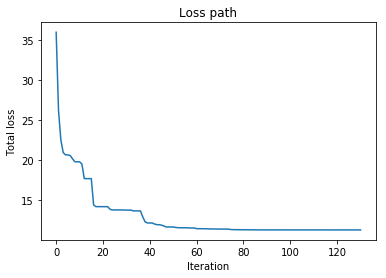

In [13]:
plot(Z, U)

In [14]:
if RENDER:
    # Wait for user interaction before visualizing. 
    _ = input("Press ENTER to continue")

Press ENTER to continue


In [15]:
for u in U:
    env.apply(u)

In [16]:
env.close()